In [1]:
import os,sys,inspect
os.chdir('../')


from simulator import * 
import preprocessing.deconvolution as deconv
import preprocessing.autoencoders 
import detector.naive_detector as naive_detector
import utils

import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
sim = simulator(100, 1)
print(sim)

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1


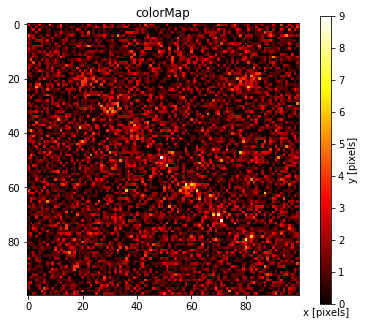

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1
atom count: 8
photons_in_background is set to 1 by default
SNR: 2
x0: [20. 30. 40. 50. 60. 70. 80. 80.]
y0: [20. 30. 40. 50. 60. 70. 80. 20.]


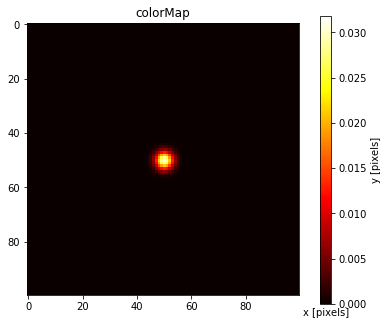

In [3]:
x0 = list(np.linspace(20, 80, 7))
y0 = list(np.linspace(20, 80, 7))

x0.append(80)
y0.append(20)
x0 = np.array(x0)
y0 = np.array(y0)

raw_image = sim.create_simulation_from_SNR(x0, y0, 2, verbose=True)
kernel = utils.gaussian_kernel(100, sim.variance, verbose=True)





Preprocessing:
------------------


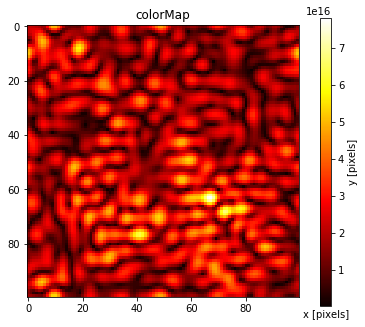

In [4]:
inv_filtered_image = deconv.inv_filter(raw_image, kernel)
visualize(inv_filtered_image)

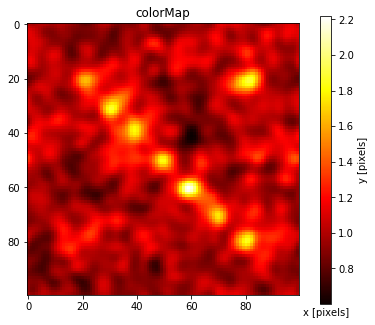

In [5]:
regularized_filtered_image = deconv.regularized_filter(raw_image, kernel, alpha=1)
visualize(regularized_filtered_image)

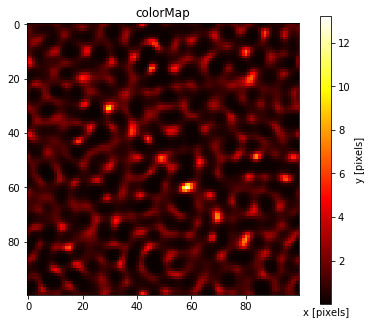

(100, 100)


In [6]:
rl_filtered_image = deconv.richardson_lucy_deconv(raw_image, kernel, 30)
visualize(rl_filtered_image)
print(rl_filtered_image.shape)

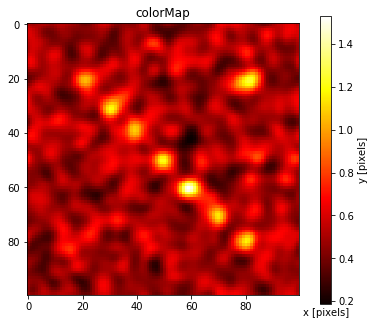

In [7]:
wiener_filtered_image = deconv.wiener_deconv(raw_image, kernel)
visualize(wiener_filtered_image)

Detecting Atoms Using the Filtered Image
-------------------------------

1. make a around the atom and then apply the naive classifier\\
2. do a binary classifier on every pixel

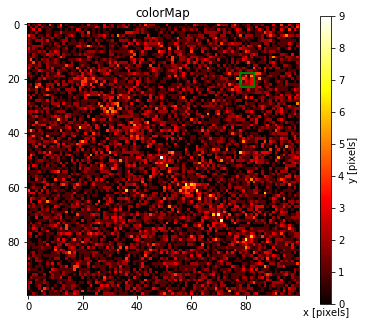

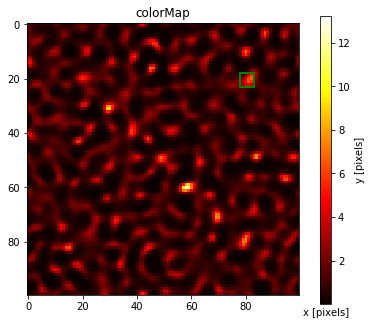

In [8]:
clf = naive_detector.detector(100, 80, 20, 5, 5)
clf.visualize_data(raw_image)
clf.visualize_data(rl_filtered_image)

In [27]:
SNR = np.linspace(0.1, 2, 20)
x0 = list(np.linspace(20, 80, 7))
y0 = list(np.linspace(20, 80, 7))

x0.append(80)
y0.append(20)
x0 = np.array(x0)
y0 = np.array(y0)

data_tr, labels_tr = utils.generate_data_labels(100, x0, y0, SNR, 2000)
data_test, labels_test = utils.generate_data_labels(100, x0, y0, SNR, 700)
print(data_tr.shape, labels_tr.shape)
print(data_test.shape, labels_test.shape)


time used: 160.27959632873535
time used: 56.23116683959961
(20, 2000, 100, 100) (20, 2000)
(20, 700, 100, 100) (20, 700)


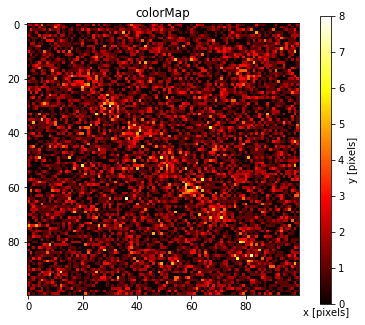

In [28]:
visualize(data_tr[-1, 19, :, :])

Classifier Performance without Deconvolution
---------------------------------

In [29]:
# normalize data
lst = []
for data in data_tr:
    lst.append(utils.normalize(data))
lst = np.array(lst)
normed_data_tr = lst

lst = []
for data in data_test:
    lst.append(utils.normalize(data))
lst = np.array(lst)
normed_data_test = lst

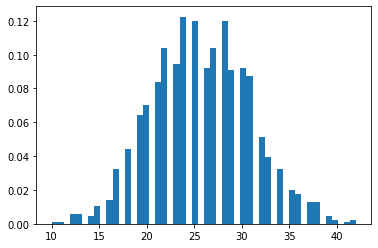

Training accuracy: 0.5544776119402985
Validation accuracy: 0.5484848484848485
Threshold: 27.066666666666666
SNR: 0.1


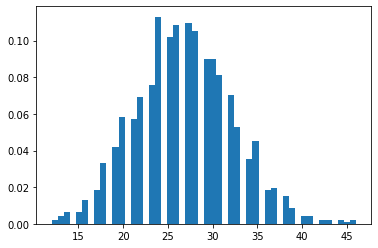

Training accuracy: 0.6037313432835821
Validation accuracy: 0.6257575757575757
Threshold: 29.0
SNR: 0.2


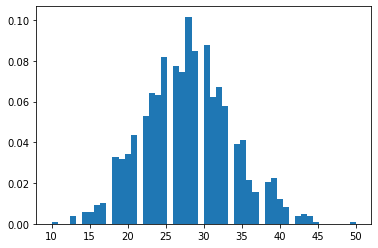

Training accuracy: 0.6776119402985075
Validation accuracy: 0.7136363636363636
Threshold: 26.842105263157894
SNR: 0.3


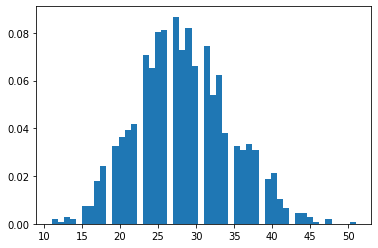

Training accuracy: 0.7425373134328358
Validation accuracy: 0.7393939393939394
Threshold: 27.842105263157894
SNR: 0.4


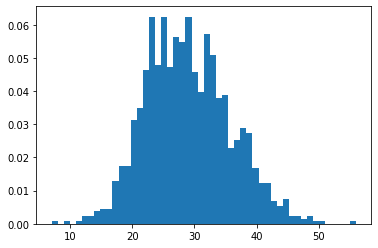

Training accuracy: 0.7925373134328358
Validation accuracy: 0.7924242424242425
Threshold: 29.458333333333332
SNR: 0.5


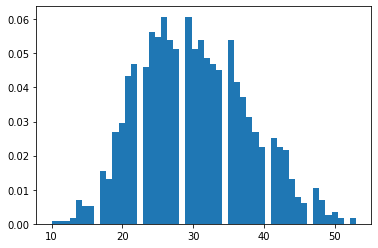

Training accuracy: 0.8276119402985075
Validation accuracy: 0.8181818181818182
Threshold: 30.476190476190474
SNR: 0.6


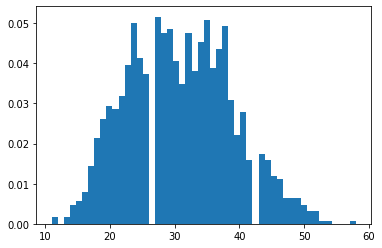

Training accuracy: 0.8597014925373134
Validation accuracy: 0.8757575757575757
Threshold: 31.434782608695656
SNR: 0.7


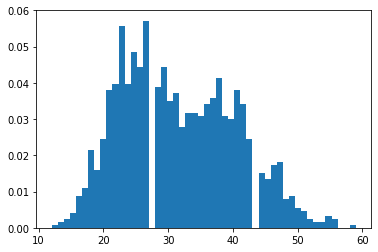

Training accuracy: 0.8873134328358209
Validation accuracy: 0.8924242424242425
Threshold: 30.39130434782609
SNR: 0.7999999999999999


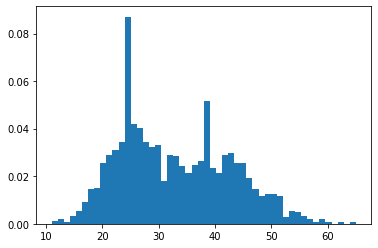

Training accuracy: 0.914179104477612
Validation accuracy: 0.9151515151515152
Threshold: 31.76923076923077
SNR: 0.8999999999999999


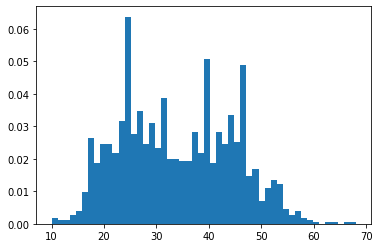

Training accuracy: 0.9305970149253732
Validation accuracy: 0.9272727272727272
Threshold: 32.78571428571429
SNR: 0.9999999999999999


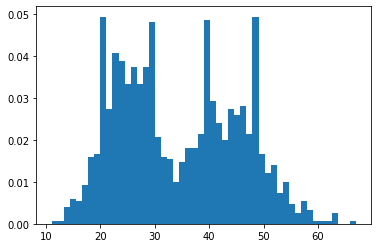

Training accuracy: 0.9485074626865672
Validation accuracy: 0.946969696969697
Threshold: 33.81481481481481
SNR: 1.0999999999999999


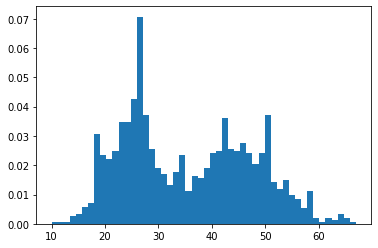

Training accuracy: 0.9544776119402985
Validation accuracy: 0.9666666666666667
Threshold: 34.42857142857143
SNR: 1.2


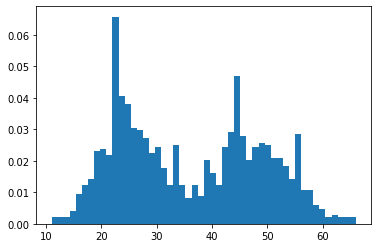

Training accuracy: 0.9701492537313433
Validation accuracy: 0.9757575757575757
Threshold: 35.44444444444444
SNR: 1.3


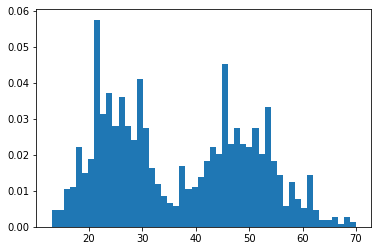

Training accuracy: 0.9746268656716418
Validation accuracy: 0.9878787878787879
Threshold: 35.39285714285714
SNR: 1.4


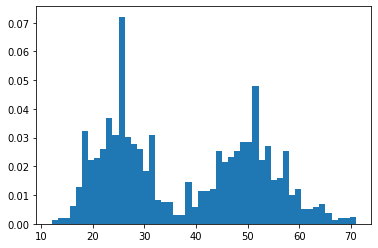

Training accuracy: 0.9850746268656716
Validation accuracy: 0.9924242424242424
Threshold: 36.41379310344827
SNR: 1.5


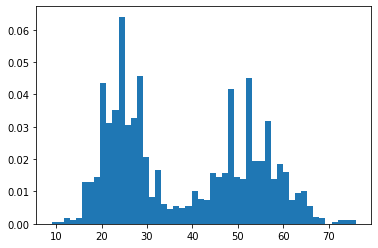

Training accuracy: 0.9850746268656716
Validation accuracy: 0.9863636363636363
Threshold: 35.39393939393939
SNR: 1.5999999999999999


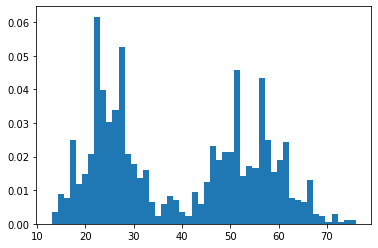

Training accuracy: 0.9888059701492538
Validation accuracy: 0.990909090909091
Threshold: 37.38709677419355
SNR: 1.7


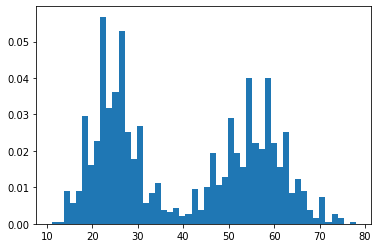

Training accuracy: 0.9940298507462687
Validation accuracy: 0.9954545454545455
Threshold: 37.39393939393939
SNR: 1.8


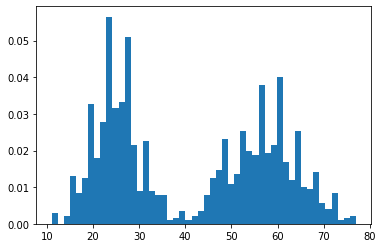

Training accuracy: 0.9925373134328358
Validation accuracy: 0.9954545454545455
Threshold: 37.8125
SNR: 1.9


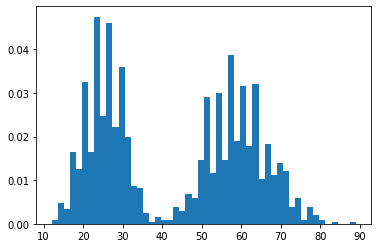

Training accuracy: 0.9970149253731343
Validation accuracy: 0.996969696969697
Threshold: 40.368421052631575
SNR: 2.0


In [30]:
accuracies_tr, accuracies_val, thresholds = [], [], []
for i in range(data_tr.shape[0]):
    d_tr, l_tr = data_tr[i], labels_tr[i]
    accuracy_tr, accuracy_val, thresh = clf.train(d_tr, l_tr, verbose=True)
    accuracies_tr.append(accuracy_tr)
    accuracies_val.append(accuracy_val)
    thresholds.append(thresh)
    print(f"SNR: {SNR[i]}")


Classifier Performance with Deconvolution
-------------------------------

In [35]:
# filter data_tr, which is not normalized
prev_time = time.time()
filtered_data_tr = []
for i in range(data_tr.shape[0]):
    snr_lst = []
    for j in range(data_tr.shape[1]):
        image = data_tr[i, j]
        filtered_image = deconv.wiener_deconv(image, kernel)
        snr_lst.append(filtered_image)
    filtered_data_tr.append(snr_lst)
filtered_data_tr = np.array(filtered_data_tr)
print(f"time elapsed: {time.time() - prev_time}")

prev_time = time.time()
filtered_data_test = []
for i in range(data_test.shape[0]):
    snr_lst = []
    for j in range(data_test.shape[1]):
        image = data_test[i, j]
        filtered_image = deconv.wiener_deconv(image, kernel)
        snr_lst.append(filtered_image)
    filtered_data_test.append(snr_lst)
filtered_data_test = np.array(filtered_data_test)
print(f"time elapsed: {time.time() - prev_time}")

time elapsed: 228.4869842529297
time elapsed: 76.17042303085327


In [36]:
# normalize filtered data
lst = []
for data in filtered_data_tr:
    lst.append(utils.normalize(data))
lst = np.array(lst)
filtered_normed_data_tr = lst

lst = []
for data in filtered_data_test:
    lst.append(utils.normalize(data))
lst = np.array(lst)
filtered_normed_data_test = lst

In [37]:
clf2 = naive_detector.detector(100, 80, 20, 5, 5)


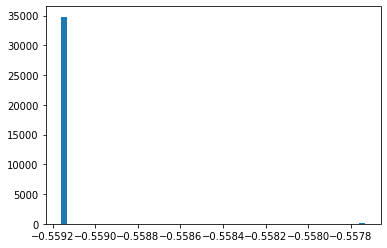

ValueError: attempt to get argmax of an empty sequence

In [39]:
filtered_accuracies_tr, filtered_accuracies_val, filtered_thresholds = [], [], []
for i in range(filtered_normed_data_tr.shape[0]):
    d_tr, l_tr = filtered_normed_data_tr[i], labels_tr[i]
    filtered_accuracy_tr, filtered_accuracy_val, filtered_thresh = clf2.train(d_tr, l_tr, verbose=True)
    filtered_accuracies_tr.append(filtered_accuracy_tr)
    filtered_accuracies_val.append(filtered_accuracy_val)
    filtered_thresholds.append(filtered_thresh)
    print(f"SNR: {SNR[i]}")


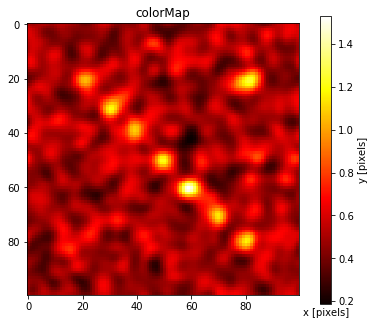

In [15]:
b = deconv.wiener_deconv(raw_image, kernel)
visualize(b)

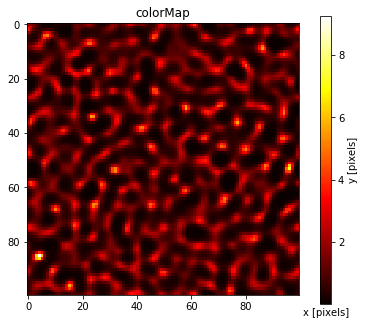

In [16]:
d = data_tr[-1, 9]
a = deconv.richardson_lucy_deconv(d, kernel, 30)
visualize(a)